In [8]:
import matplotlib as plt
import mne

/Users/dengeman/miniforge3-arm/lib/python3.9/site-packages/numba/cpython/hashing.py:484: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)


In [9]:
raw = mne.io.read_raw_edf('./inputs/sub-CBM00003_task-protmap_eeg.edf')

Extracting EDF parameters from /Users/dengeman/github/eeg-pred-modeling-summer-school/inputs/sub-CBM00003_task-protmap_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [10]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1-REF, Fp2-REF, F3 -REF, F4 -REF, C3 -REF, C4 -REF, P3 -REF, ...
 chs: 123 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 50.0 Hz
 meas_date: 2019-01-01 09:44:45 UTC
 nchan: 123
 projs: []
 sfreq: 200.0 Hz
>

In [12]:
raw.ch_names

['Fp1-REF',
 'Fp2-REF',
 'F3 -REF',
 'F4 -REF',
 'C3 -REF',
 'C4 -REF',
 'P3 -REF',
 'P4 -REF',
 'O1 -REF',
 'O2 -REF',
 'F7 -REF',
 'F8 -REF',
 'T7 -REF',
 'T8 -REF',
 'P7 -REF',
 'P8 -REF',
 'Fz -REF',
 'Cz -REF',
 'Pz -REF',
 'F1 -REF',
 'F2 -REF',
 '22',
 '23',
 'P1 -REF',
 'P2 -REF',
 'AF3-REF',
 'AF4-REF',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 'FT7-REF',
 'FT8-REF',
 '36',
 '37',
 'P5 -REF',
 'P6 -REF',
 'FC5-REF',
 'FC6-REF',
 '42',
 '43',
 'C5 -REF',
 'C6 -REF',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 'TP7-REF',
 'TP8-REF',
 'PO5-REF',
 'PO6-REF',
 '56',
 '57',
 'AF7-REF',
 'AF8-REF',
 '60',
 '61',
 'FpZ-REF',
 '63',
 'FCZ-REF',
 'CPZ-REF',
 'POZ-REF',
 'OZ -REF',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 'PO3-REF',
 'PO4-REF',
 '80',
 '81',
 'CP1-REF',
 'CP2-REF',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 'CP3-REF',
 'CP4-REF',
 '92',
 '93',
 '94',
 '95',
 'C1 -REF',
 'C2 -REF',
 'F5 -REF',
 'F6 -REF',
 'FC3-REF',
 'FC4-REF',
 'FC1-REF',
 

In [13]:
raw.times[-1]

1674.995

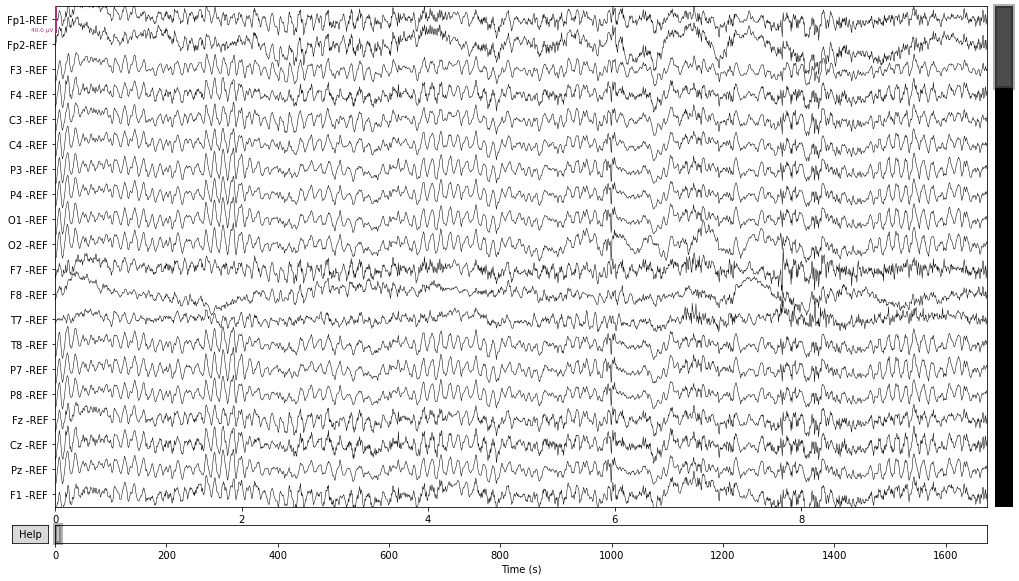

In [16]:
%matplotlib inline
# use a regular terminal for interactive plotting
raw.plot();

In [18]:
montage = mne.channels.make_standard_montage('standard_1005')

In [19]:
len(montage.ch_names)

343

In [22]:
len(raw.ch_names)

123

In [23]:
raw.load_data()

Reading 0 ... 334999  =      0.000 ...  1674.995 secs...


<RawEDF | sub-CBM00003_task-protmap_eeg.edf, 123 x 335000 (1675.0 s), ~314.5 MB, data loaded>

In [24]:
montage.rename_channels({'FFT7h': 'FFC7h', 'FFT8h': 'FFC8h'})

In [25]:
raw.set_montage(montage)

ValueError: DigMontage is only a subset of info. There are 123 channel positions not present in the DigMontage. The required channels are:

['Fp1-REF', 'Fp2-REF', 'F3 -REF', 'F4 -REF', 'C3 -REF', 'C4 -REF', 'P3 -REF', 'P4 -REF', 'O1 -REF', 'O2 -REF', 'F7 -REF', 'F8 -REF', 'T7 -REF', 'T8 -REF', 'P7 -REF', 'P8 -REF', 'Fz -REF', 'Cz -REF', 'Pz -REF', 'F1 -REF', 'F2 -REF', '22', '23', 'P1 -REF', 'P2 -REF', 'AF3-REF', 'AF4-REF', '28', '29', '30', '31', '32', '33', 'FT7-REF', 'FT8-REF', '36', '37', 'P5 -REF', 'P6 -REF', 'FC5-REF', 'FC6-REF', '42', '43', 'C5 -REF', 'C6 -REF', '46', '47', '48', '49', '50', '51', 'TP7-REF', 'TP8-REF', 'PO5-REF', 'PO6-REF', '56', '57', 'AF7-REF', 'AF8-REF', '60', '61', 'FpZ-REF', '63', 'FCZ-REF', 'CPZ-REF', 'POZ-REF', 'OZ -REF', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', 'PO3-REF', 'PO4-REF', '80', '81', 'CP1-REF', 'CP2-REF', '84', '85', '86', '87', '88', '89', 'CP3-REF', 'CP4-REF', '92', '93', '94', '95', 'C1 -REF', 'C2 -REF', 'F5 -REF', 'F6 -REF', 'FC3-REF', 'FC4-REF', 'FC1-REF', 'FC2-REF', '104', '105', '106', '107', '108', '109', '110', '111', 'CP5-REF', 'CP6-REF', 'PO7-REF', 'PO8-REF', '116', '117', '118', '119', '120', '121', '122', 'DC1'].

Consider using inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.

## Our approach is wrong -- this is a BIDS dataset; we need bids-aware tools to make sense of it

Effective window size : 10.240 (s)


<ipython-input-27-d9fd1268d8bf>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, xscale='log');


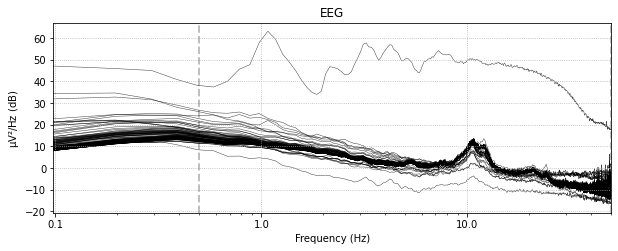

In [27]:
# we can nevertheless plot our power spectrum, however without spatial colors
raw.plot_psd(fmax=50, xscale='log');

In [28]:
# Let's fix now our approach and use MNE-BIDS

In [29]:
import mne_bids

In [30]:
import pathlib

In [31]:
bids_root = pathlib.Path('/Users/dengeman/study_data/CHBMP_EEG_and_MRI/ds_bids_chbmp')

In [32]:
bids_path = mne_bids.BIDSPath(subject='CBM00003', root=bids_root, task='protmap')

In [33]:
raw = mne_bids.read_raw_bids(bids_path)

Extracting EDF parameters from /Users/dengeman/study_data/CHBMP_EEG_and_MRI/ds_bids_chbmp/sub-CBM00003/eeg/sub-CBM00003_task-protmap_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from /Users/dengeman/study_data/CHBMP_EEG_and_MRI/ds_bids_chbmp/sub-CBM00003/eeg/sub-CBM00003_task-protmap_events.tsv.
Reading channel info from /Users/dengeman/study_data/CHBMP_EEG_and_MRI/ds_bids_chbmp/sub-CBM00003/eeg/sub-CBM00003_task-protmap_channels.tsv.


/Users/dengeman/github/mne-bids/mne_bids/read.py:716: RuntimeWarning: Participants file not found for sub-CBM00003_task-protmap_eeg.edf... Not reading in any particpants.tsv data.
  warn("Participants file not found for {}... Not reading "


In [34]:
raw.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'F1',
 'F2',
 'CP3h',
 'CP4h',
 'P1',
 'P2',
 'AF3',
 'AF4',
 'FCC1h',
 'FCC2h',
 'CPP3',
 'CPP4',
 'POO5',
 'POO6',
 'FT7',
 'FT8',
 'FFC3h',
 'FFC4h',
 'P5',
 'P6',
 'FC5',
 'FC6',
 'FCC5h',
 'FCC6h',
 'C5',
 'C6',
 'TTP7h',
 'TTP8h',
 'CPP5h',
 'CPP6h',
 'FTT7h',
 'FTT8h',
 'TP7',
 'TP8',
 'PO5',
 'PO6',
 'T9',
 'T10',
 'AF7',
 'AF8',
 'FFC7h',
 'FFC8h',
 'FpZ',
 'AFz',
 'FCZ',
 'CPZ',
 'POZ',
 'OZ',
 'AFF1h',
 'AFF2h',
 'FFC1h',
 'FFC2h',
 'CCP1h',
 'CCP2h',
 'CP1h',
 'CP2h',
 'CPP1h',
 'CPP2h',
 'PO3',
 'PO4',
 'POO1',
 'POO2',
 'CP1',
 'CP2',
 'AFF5h',
 'AFF6h',
 'FFC5h',
 'FFC6h',
 'CCP3h',
 'CCP4h',
 'CP3',
 'CP4',
 'PPO5h',
 'PPO6h',
 'PPO3h',
 'PPO4h',
 'C1',
 'C2',
 'F5',
 'F6',
 'FC3',
 'FC4',
 'FC1',
 'FC2',
 'CP5h',
 'CP6h',
 'POO7h',
 'POO8h',
 'FCC3h',
 'FCC4h',
 'CCP5h',
 'CCP6h',
 'CP5',
 'CP6',
 'PO7',
 'PO8',
 'FTT9h',
 'FTT10h',
 '

In [35]:
raw.set_channel_types({'DC1': "misc"})

<RawEDF | sub-CBM00003_task-protmap_eeg.edf, 123 x 335000 (1675.0 s), ~118 kB, data not loaded>

In [36]:
raw.set_montage(montage, match_case=False)

<RawEDF | sub-CBM00003_task-protmap_eeg.edf, 123 x 335000 (1675.0 s), ~166 kB, data not loaded>

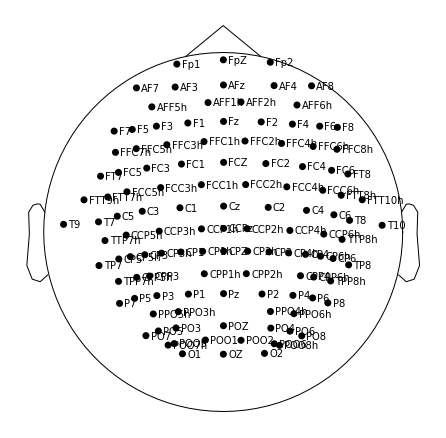

In [37]:
raw.plot_sensors(show_names=True);

Effective window size : 10.240 (s)


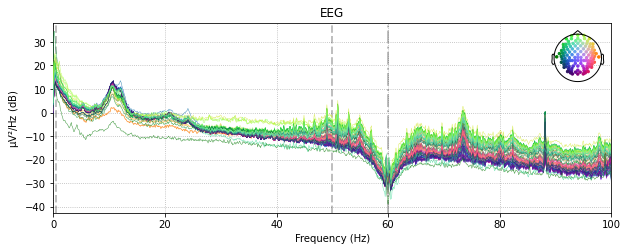

In [38]:
raw.plot_psd();